# protostars
## 22- `star_proto_varA_K_delR.py` experiment 9
### I. Experiment with variable exponent of reddening, and rebranding of vsini

`Starfish` with the `star_proto_varA_K_delR.py` code

Full available spectral region

In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/exp9/output/bb_absolute/run02/emcee_chain.npy")

In [3]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [4]:
ws.shape

(40, 5000, 16)

In [5]:
from matplotlib.ticker import MaxNLocator

In [6]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$\delta R$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$A_K$", r"$\alpha$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

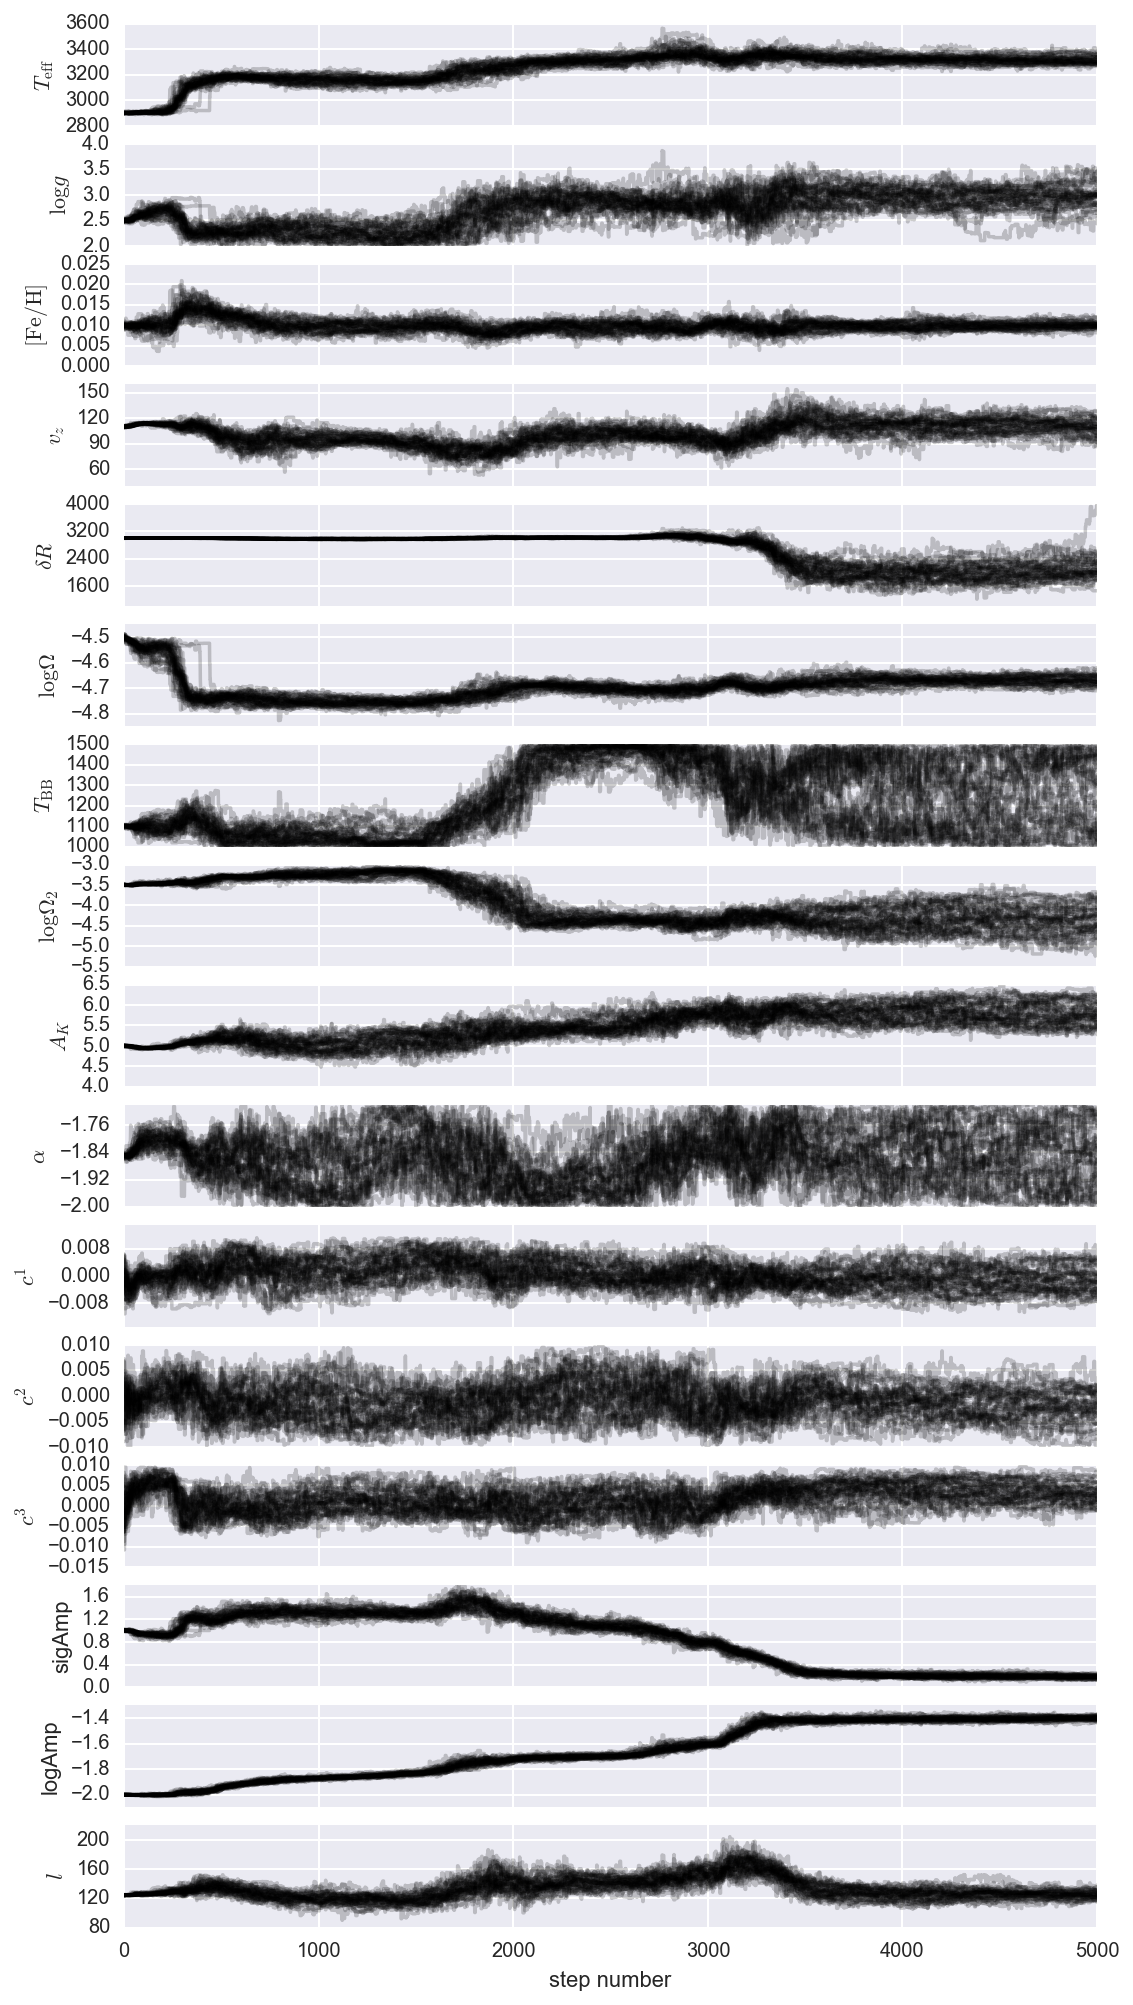

In [7]:
fig, axes = plt.subplots(16, 1, sharex=True, figsize=(8, 14))
for i in range(0, 16, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[15].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

Looks good!

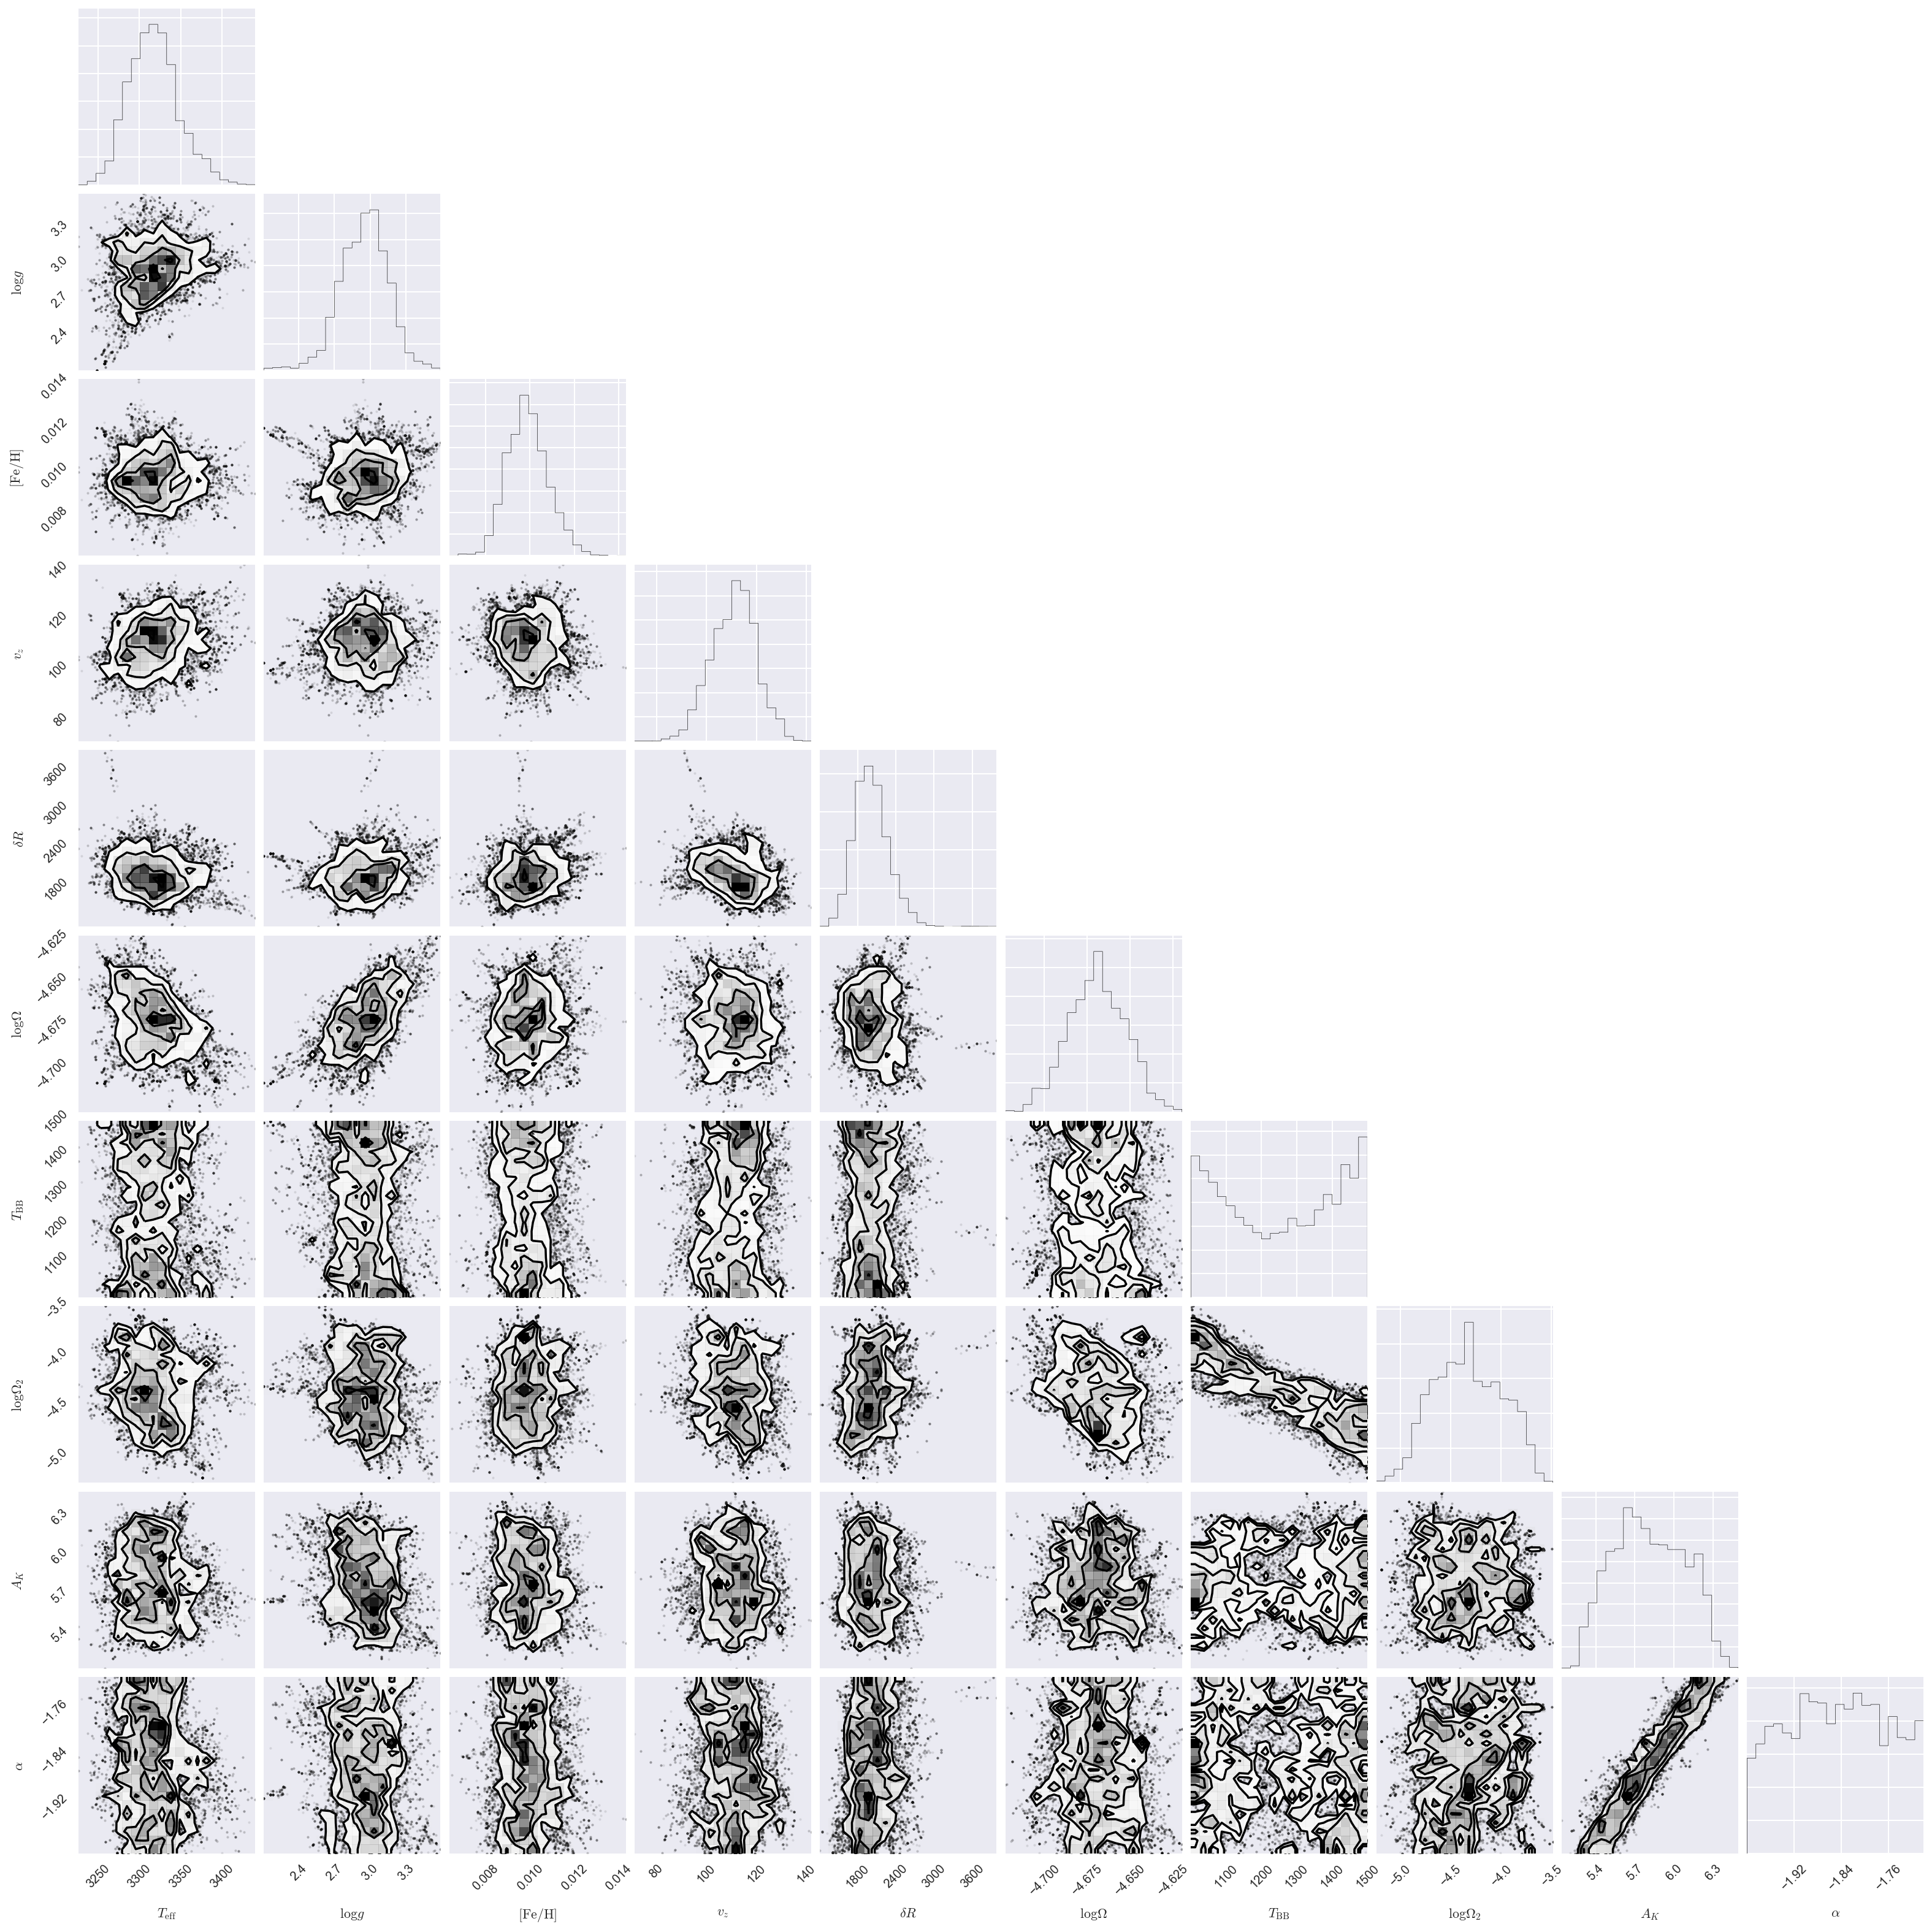

In [8]:
import corner
fig = corner.corner(fc[:, 0:10], labels=label[0:10])
fig.savefig('../plots/exp9_run02_corner.png', dpi=300)

In [9]:
import h5py

f = h5py.File("../data/reduced/S68N_NIRSPEC.hdf5", "r")

wl = np.array(f['wls'])
fl = np.array(f['fls'])

f.close()

In [10]:
raw_mods = np.load('../sf/exp9/output/bb_absolute/run02/temp_raw_models.npy')

EOFError: Ran out of input

In [11]:
fc.shape

(40000, 16)

In [12]:
om_rat = 10**fc[:, 7]/(10**fc[:, 5])

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


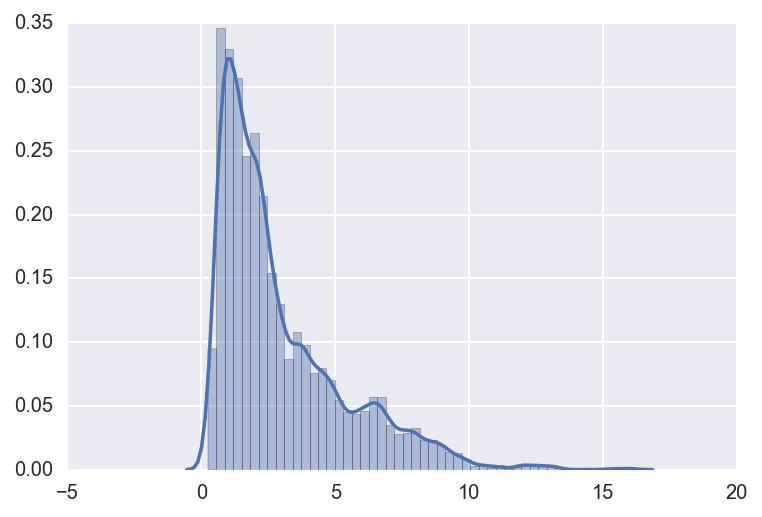

In [13]:
sns.distplot(om_rat)

In [ ]:
len(wl)

In [ ]:
r_lam_all = np.zeros((1000, 40, ))

for j in range(4000, 5000, 1):
    for i in range(0, 40, 1):
        r_lam_all[j-4000, i] = raw_mods[j][i][1, :]/raw_mods[j][i][0, :]

In [33]:
star, disk, extinc, cheb = (raw_mods[4698][9][i, :] for i in range(4))

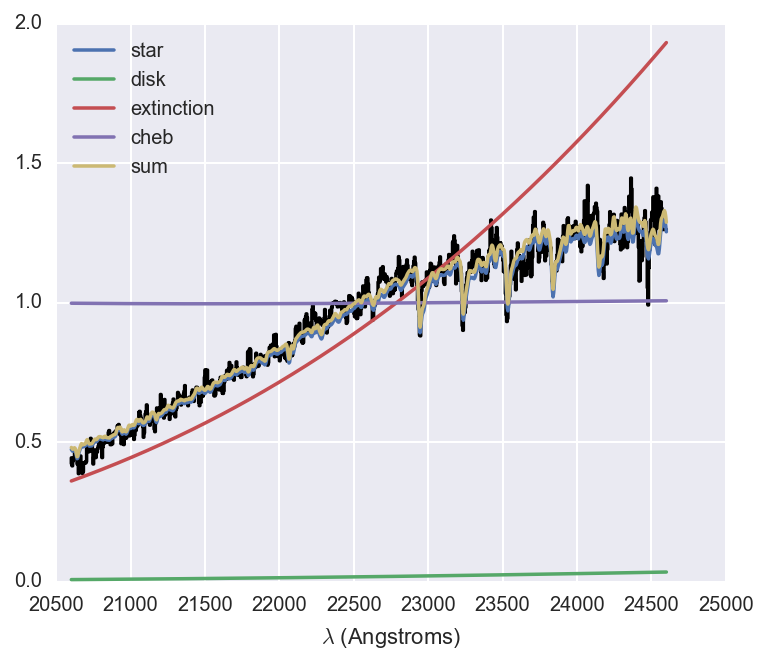

In [34]:
plt.figure(figsize=(6, 5))
plt.step(wl, fl, 'k')
plt.plot(wl, star, label = 'star')
plt.plot(wl, disk, label = 'disk')
plt.plot(wl, extinc, label = 'extinction')
plt.plot(wl, cheb, label = 'cheb')
plt.plot(wl, star+disk, label = 'sum')
plt.xlabel('$\lambda$ (Angstroms)')
plt.legend(loc='best')

Looks good!